In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

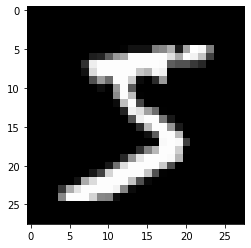

Label: 5


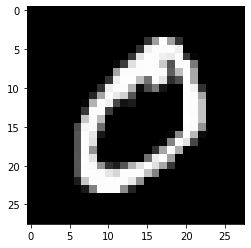

Label: 0


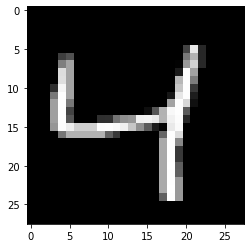

Label: 4


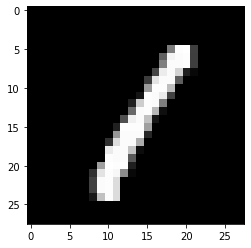

Label: 1


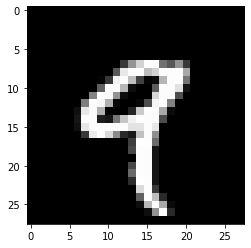

Label: 9


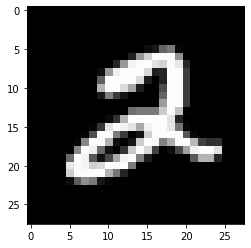

Label: 2


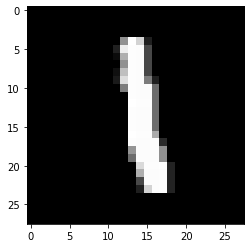

Label: 1


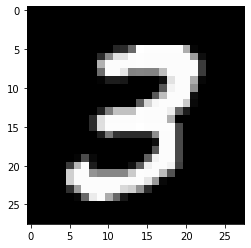

Label: 3


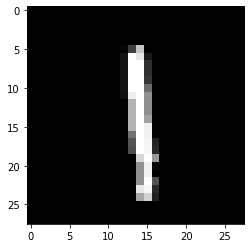

Label: 1


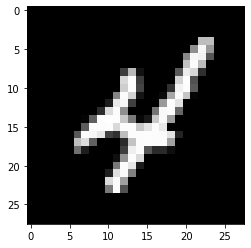

Label: 4


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[100], cmap='gray')

for i in range(10):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()
    print("Label: {}".format(y_train[i]))

In [10]:
print(x_train[2])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.  67. 232.  39.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  62.  81.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0. 120. 180.  39.   0.   0.  

In [8]:
print(x_train.dtype, y_train.dtype)
x_train, x_test = x_train.astype('float32') , x_test.astype('float32')

uint8 uint8


In [9]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [11]:
num_classes = 10
num_features = x_train.shape[1]*x_train.shape[2]

x_train, x_test = tf.reshape(x_train, [-1, num_features]), tf.reshape(x_test, [-1, num_features])
print(x_train.shape)

x_train, x_test = x_train/255., x_test/255.

(60000, 784)


2022-07-26 14:48:18.819561: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-26 14:48:18.819676: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (piai-Precision-7920-Tower): /proc/driver/nvidia/version does not exist
2022-07-26 14:48:18.820985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([num_features, num_classes]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([num_classes]))
# print(W)

def softmax_transformation(x):
    return tf.nn.softmax(tf.matmul(x,W)+b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true*tf.math.log(y_pred), axis=1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, axis=1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [21]:
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

In [28]:
lr = 0.01
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x,y):
    with tf.GradientTape() as g:    #loss값을 GradientTape에 저장
        pred = softmax_transformation(x)
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [30]:
num_epoch = 15
display_step = 100

for epoch in range(num_epoch):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
        
        if step % display_step == 0:
            pred = softmax_transformation(batch_x)
            loss = cross_entropy(pred, batch_y)
            acc = accuracy(pred, batch_y)
            print("epoch: ", epoch, "step: ", step, "loss: ", loss.numpy(), "acc: ", acc.numpy())

epoch:  0 step:  100 loss:  3.4193718 acc:  0.535
epoch:  0 step:  200 loss:  2.9432602 acc:  0.52
epoch:  0 step:  300 loss:  3.5713391 acc:  0.53
epoch:  1 step:  100 loss:  2.759941 acc:  0.59
epoch:  1 step:  200 loss:  2.5862741 acc:  0.565
epoch:  1 step:  300 loss:  2.7448785 acc:  0.58
epoch:  2 step:  100 loss:  2.4417014 acc:  0.6
epoch:  2 step:  200 loss:  2.5150466 acc:  0.62
epoch:  2 step:  300 loss:  2.217412 acc:  0.64
epoch:  3 step:  100 loss:  2.3945682 acc:  0.61
epoch:  3 step:  200 loss:  2.214979 acc:  0.63
epoch:  3 step:  300 loss:  1.9538585 acc:  0.665
epoch:  4 step:  100 loss:  2.7574267 acc:  0.585
epoch:  4 step:  200 loss:  1.9122326 acc:  0.67
epoch:  4 step:  300 loss:  2.2730513 acc:  0.635
epoch:  5 step:  100 loss:  2.050848 acc:  0.66
epoch:  5 step:  200 loss:  2.4401445 acc:  0.62
epoch:  5 step:  300 loss:  1.932626 acc:  0.67
epoch:  6 step:  100 loss:  1.7112012 acc:  0.7
epoch:  6 step:  200 loss:  1.8264884 acc:  0.665
epoch:  6 step:  300 

In [31]:
pred = softmax_transformation(x_test)
acc = accuracy(pred, y_test)
print(acc.numpy())

0.7526
